In [1]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
X,y = make_regression(100,3, noise=7)
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float().view(100,1)
print(X.shape)
print(y.shape)

torch.Size([100, 3])
torch.Size([100, 1])


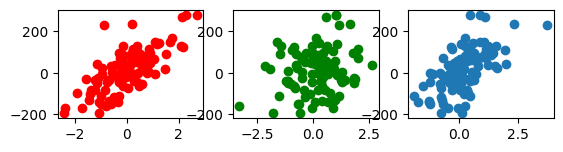

In [3]:
plt.subplot(3,3,1)
plt.scatter(X[:,0],y, c='r')
plt.subplot(3,3,2)
plt.scatter(X[:,1],y, c='g')
plt.subplot(3,3,3)
plt.scatter(X[:,2],y)
plt.show()

In [4]:
W = torch.randn(3,1, requires_grad=True)
b = torch.zeros(1,1, requires_grad=True)

In [5]:
W.shape
b.shape

torch.Size([1, 1])

In [11]:
y_pred = X@W+b
loss = ((y_pred-y)**2).mean()
loss.item()

43.31925964355469

In [7]:
W.retain_grad()

In [10]:
# Training

for i in range(100):
    y_pred = X@W+b
    loss = ((y_pred-y)**2).mean()
    loss.backward()
    W = W - .1*W.grad
    b = b - .1*b.grad
    b.grad = None
    W.grad = None
    W.retain_grad()
    b.retain_grad()
print(loss.item())

43.31925964355469


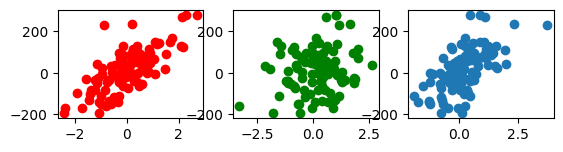

In [21]:
plt.subplot(3,3,1)
plt.scatter(X[:,0],y, c='r')
plt.subplot(3,3,2)
plt.scatter(X[:,1],y, c='g')
plt.subplot(3,3,3)
plt.scatter(X[:,2],y)
plt.show()